In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
sns.set_style("white")

# Посмотреть файлы с сечениями к моделированию

In [2]:
file_new = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_nikitap', sep=' ', header=None, index_col=0)
file_old = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_cmd2', sep=' ', header=None, index_col=0)

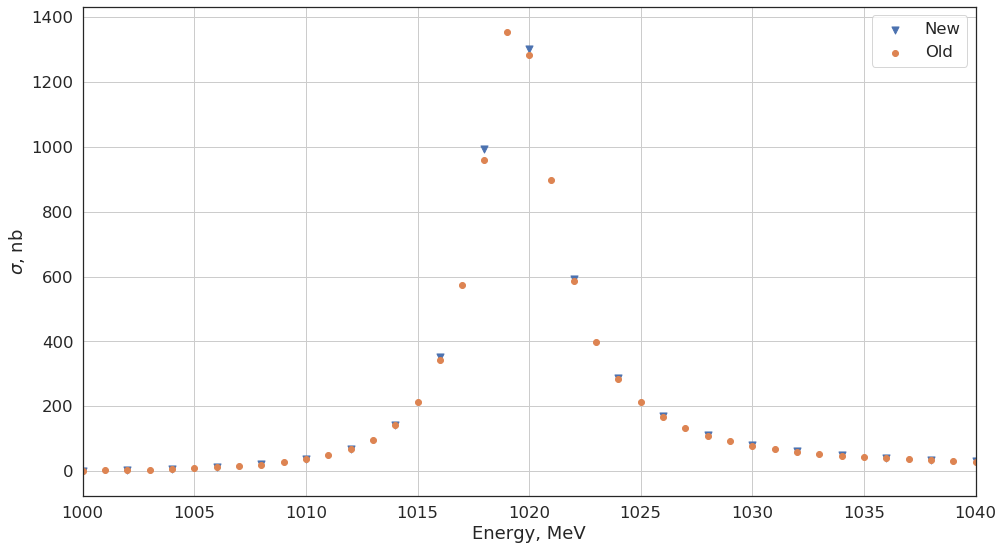

In [16]:
plt.scatter(x=file_new[1], y=file_new[2], label='New', marker='v', s=50)
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1000, 1040)
plt.legend(frameon=True);

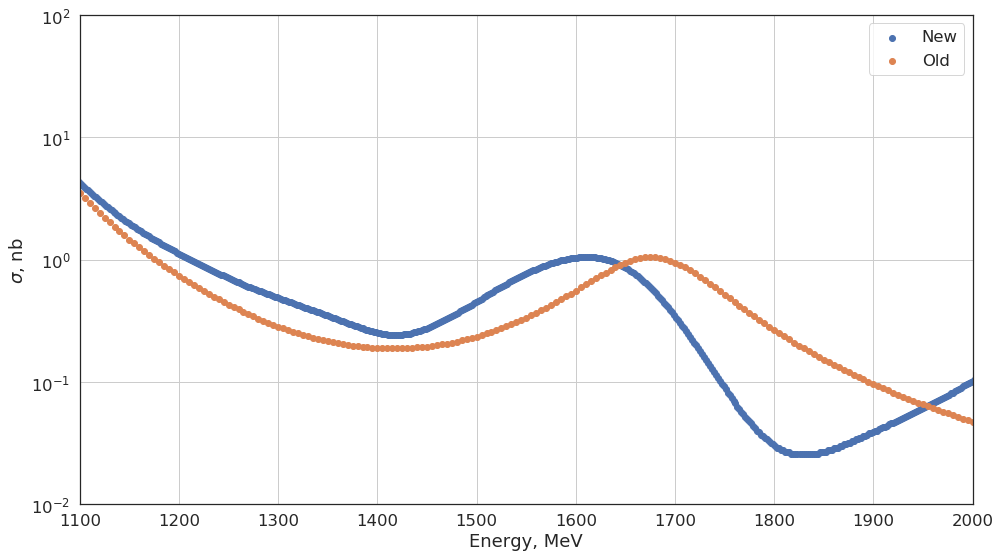

In [14]:
plt.scatter(x=file_new[1], y=file_new[2], label='New')
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1100, 2000)
plt.ylim(0.01, 100)
plt.yscale('log')
plt.legend(frameon=True)

Теперь основная часть

In [2]:
energy = 750
entrystop = None#1e5

In [6]:
# f = uproot.open(f'root://cmd//scan2011/scan2011_tr_ph_fc_e{energy}_v6.root')

In [3]:
#Сравниваю два файла моделирования
f1 = uproot.open('/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.5.root') #custom mc
f2 = uproot.open('/store17/lukinp/Analysis/klks_high/sim/tr_ph/tr_ph_750.root') #old mc

# Работа с блоком треков

In [4]:
pmin_cut = 40
pmax_cut = 1.1*energy
z_cut = 13
theta_cut = 0.6
theta2_cut = np.pi - theta_cut
hit_cut = 6
chi2r_cut = 30
chi2z_cut = 25
rho_cut = 0.1

In [5]:
import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor()

In [11]:
def get_table(file):
    return file['tr_ph'].pandas.df(branches=['tptot', 'nt', 'tdedx', 'tz', 'tth', 'tphi', 'tnhit', \
                                          'tchi2r', 'tchi2z', 'trho', 'emeas'], executor=executor, entrystop=entrystop)

In [12]:
%time df = [get_table(f1), get_table(f2)]

CPU times: user 363 ms, sys: 22.9 ms, total: 386 ms
Wall time: 358 ms


In [15]:
print( df[0].emeas.value_counts(), df[0].emeas.value_counts(), sep='\n' )

750.0    26312
Name: emeas, dtype: int64
750.0    26312
Name: emeas, dtype: int64


In [16]:
df2 = [ d.query('nt>=2') for d in df] #условие на количество треков

In [17]:
df2[0].head(20)

tptot  nt        tdedx        tz       tth      tphi  \
entry subentry                                                              
2     0         324.856995   2  9184.095703  3.477002  1.704522  4.761034   
      1         368.864075   2  1677.188232  0.949529  0.802703  3.083441   
3     0         203.808105   2  1971.764038 -0.253979  2.099569  5.207148   
      1         239.342880   2  2469.064941 -0.340946  1.385059  1.338465   
5     0         403.799103   2  2135.829102  0.394682  1.298290  2.272550   
      1         310.364471   2  1980.140137 -0.121171  2.498975  2.694685   
6     0         186.427917   2  2129.402832  3.147325  2.177391  2.672662   
      1         425.766449   2  1484.441162 -3.937316  0.679239  2.766599   
8     0          95.336472   2  2406.710938  1.497105  1.654737  1.413866   
      1         268.210480   2  1691.352905 -0.909994  0.835823  0.755512   
9     0         248.807922   2  2651.989258 -2.288425  1.803475  1.504347   
      1         212.807831   2  1737.571655 -2.861794  2.362400  4.996923   
10    0         395.263855   2  2024.022095 -0.379225  1.886385  2.317596   
      1         120.302910   2  3160.376221 -0.650984  1.240666  4.429439   
12    0         359.343628   3  6847.568848  0.571114  1.155837  0.585586   
      1         362.355072   3  1979.965088  0.815442  1.066541  1.800053   
      2         205.341629   3  2244.633057 -0.615112  2.153895  3.393112   
13    0         331.468903   2  1902.867676 -0.021752  1.877137  5.903520   
      1         109.879890   2  3020.332520  1.476614  1.702843  1.441867   
14    0         265.950684   2  1602.848877 -0.679925  1.248700  3.954024   

                tnhit    tchi2r    tchi2z      trho  emeas  
entry subentry                                              
2     0            26  0.424237  0.649142 -1.949702  750.0  
      1            13  0.687312  0.398777  1.707997  750.0  
3     0            25  0.439513  0.937413  0.543472  750.0  
      1            23  0.576967  0.650079 -0.418531  750.0  
5     0            21  1.137090  1.329248 -0.013205  750.0  
      1            10  0.651581  1.673971 -0.026406  750.0  
6     0            17  0.526820  0.979777  0.054211  750.0  
      1            13  1.870392  1.373152 -0.128695  750.0  
8     0             9  5.656591  1.009954  0.727085  750.0  
      1             7  5.110496  1.458905  0.861191  750.0  
9     0            21  0.665530  0.805418 -0.585537  750.0  
      1             8  4.073660  1.205882  1.046863  750.0  
10    0            22  1.173475  0.894472  0.454974  750.0  
      1            19  0.478923  0.866268 -1.450589  750.0  
12    0            12  0.623880  1.445224  3.620444  750.0  
      1            20  0.864471  0.906634 -4.756293  750.0  
      2            31  0.563100  1.718053 -5.873798  750.0  
13    0            23  1.318402  1.395437  1.531828  750.0  
      1            18  2.122723  1.061096 -1.856472  750.0  
14    0            16  2.205350  0.957460  0.566213  750.0

In [18]:
df2 = [ d.query('tptot>@pmin_cut&\
tptot<@pmax_cut&\
abs(tz)<@z_cut&\
tchi2r<@chi2r_cut&\
tchi2z<@chi2z_cut&\
tth>@theta_cut&tth<@theta2_cut&\
tnhit>@hit_cut&\
abs(trho)>@rho_cut') for d in df2 ]

In [19]:
df2[0].shape

(15357, 11)

In [20]:
drop_entries = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df2]

In [21]:
df3 = [ d.drop(index=de, level=0) for d,de in zip(df2,drop_entries) ]

In [22]:
df3[0].shape

(11828, 11)

In [23]:
df6 = [ d.query('tdedx<16000') for d in df3 ]

In [24]:
def piDeDx(P):
    return 5.58030e+9 / np.power(P + 40., 3) + 2.21228e+3 - 3.77103e-1 * P;
xpions = np.linspace(40, pmax_cut, 200)
ypions_max = piDeDx(xpions) + 2000
ypions_min = piDeDx(xpions) - 2000

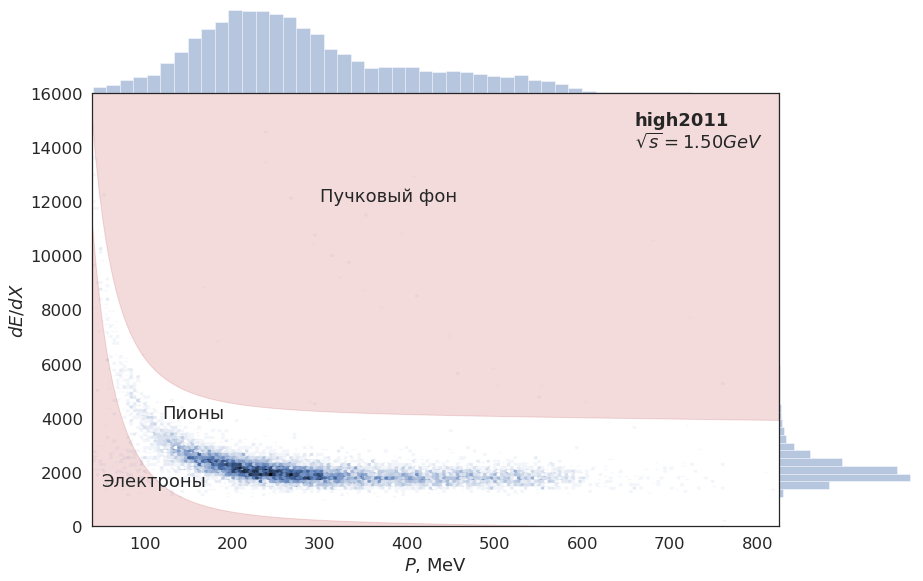

In [25]:
#fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
sns.set_style("white")

joint_kws=dict(gridsize=200)
g = sns.jointplot('tptot', 'tdedx', data=df6[0], kind="hex", color='b',ylim=(0,16000),xlim=(40,pmax_cut),\
                  space=0, joint_kws=joint_kws)
g.set_axis_labels("$P$, MeV", "$dE/dX$")
g.fig.set_size_inches(16, 9)

# g.ax_joint.plot(xpions,ypions_max, color='r', linewidth=2);
# g.ax_joint.plot(xpions,ypions_min, color='r', linewidth=2);
g.ax_joint.fill_between(xpions, ypions_min, -100, alpha=0.2, color='r')
g.ax_joint.fill_between(xpions, ypions_max, 2e5, alpha=0.2, color='r')

g.ax_joint.text(50, 1500, 'Электроны');
g.ax_joint.text(120, 4000, 'Пионы');
g.ax_joint.text(300, 12000, 'Пучковый фон');

title = 'high2011\n$\sqrt{s} = ' + f'{energy*0.002:.2f}  GeV$'
g.ax_joint.text(pmax_cut*0.8, 14000, title, fontweight='black');

#g.savefig('dedx.png', dpi=300)

In [26]:
df4 = [ d.assign(dedx_cut=piDeDx(d['tptot'])-d['tdedx']).query( 'abs( dedx_cut ) < 2000' ) for d in df3]

In [27]:
drop_events = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df4]

In [28]:
df4 = [ d.drop(index=de, level=0) for d,de in zip(df4, drop_events) ]

In [29]:
df4[0].shape

(11530, 12)

In [30]:
df4[0].head()

tptot  nt        tdedx        tz       tth      tphi  \
entry subentry                                                              
3     0         203.808105   2  1971.764038 -0.253979  2.099569  5.207148   
      1         239.342880   2  2469.064941 -0.340946  1.385059  1.338465   
9     0         248.807922   2  2651.989258 -2.288425  1.803475  1.504347   
      1         212.807831   2  1737.571655 -2.861794  2.362400  4.996923   
10    0         395.263855   2  2024.022095 -0.379225  1.886385  2.317596   

                tnhit    tchi2r    tchi2z      trho  emeas    dedx_cut  
entry subentry                                                          
3     0            25  0.439513  0.937413  0.543472  750.0  548.705768  
      1            23  0.576967  0.650079 -0.418531  750.0  -91.039053  
9     0            21  0.665530  0.805418 -0.585537  750.0 -301.886573  
      1             8  4.073660  1.205882  1.046863  750.0  739.828963  
10    0            22  1.173475  0.894472  0.454974  750.0  106.873274

## Теперь работа с блоком KS

In [31]:
align_cut = 0.8
p_cut =  2 * (0.0869 * energy - 36.53)
print(f'Align cut: {align_cut}')
print(f'Momentum cut: {p_cut:.2f} MeV')

Align cut: 0.8
Momentum cut: 57.29 MeV


In [32]:
def get_table_ks(file):
    return file['tr_ph'].pandas.df(branches=['nks', 'kstype', 'ksalign', 'ksminv', 'ksvind', \
                                            'ksptot', 'ksth', 'ksphi'], executor=executor, entrystop=entrystop)

In [33]:
%time dfks = [get_table_ks(f1), get_table_ks(f2)]

CPU times: user 343 ms, sys: 38.3 ms, total: 381 ms
Wall time: 663 ms


In [36]:
ksvind_drops = [f'ksvind[{i}]' for i in range(2,20)]
[ d.drop(ksvind_drops, axis=1, inplace=True) for d in dfks];

In [37]:
dfks[0].shape

(8343, 9)

In [38]:
[ d.query('kstype==0', inplace=True) for d in dfks];

In [39]:
index_merge = [ dks.index.droplevel(1) & d.index.droplevel(1) for dks,d in zip(dfks, df4) ]
#оставить только entry, потому что subentry в таблицах означают разные вещи
dfks = [ d.loc[ind, ] for d,ind in zip(dfks,index_merge) ]

### Оставить только лучшие KS в каждом событии

In [40]:
dfks = [ d.assign(difmass = np.abs(d['ksminv'] - 497.6) ) for d in dfks ]
min_difmasses = [ d.groupby('entry').agg({'difmass':np.min}) for d in dfks ]
dfks2 = [pd.merge(md, d, on=['difmass', 'entry']).drop(['difmass'], axis=1) for md, d in zip(min_difmasses, dfks)]

In [41]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
3,1,0,0.999349,496.999298,0,1,166.222824,1.931401,0.497805
9,1,0,0.993942,494.615082,0,1,241.339386,2.681560,0.906101
10,1,0,0.999980,497.143250,0,1,342.681824,1.819210,2.627396
13,1,0,0.892034,430.287109,0,1,324.635010,1.932929,6.237650
16,1,0,0.991293,482.371124,0,1,272.219238,0.383230,4.365769


In [42]:
dfks2[0].shape

(4782, 9)

### Разница между исправленными углами и начальными

In [43]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
3,1,0,0.999349,496.999298,0,1,166.222824,1.931401,0.497805
9,1,0,0.993942,494.615082,0,1,241.339386,2.681560,0.906101
10,1,0,0.999980,497.143250,0,1,342.681824,1.819210,2.627396
13,1,0,0.892034,430.287109,0,1,324.635010,1.932929,6.237650
16,1,0,0.991293,482.371124,0,1,272.219238,0.383230,4.365769


In [54]:
df_ang = [ d.loc[dks.index,].copy() for d, dks in zip(df4, dfks2)]
df_ang = [ d.assign(px = d.tptot*np.sin(d.tth)*np.cos(d.tphi),\
              py = d.tptot*np.sin(d.tth)*np.sin(d.tphi),\
              pz = d.tptot*np.cos(d.tth)) for d in df_ang]

In [55]:
df_ang = [ d[['px','py','pz']].groupby('entry').agg('sum') for d in df_ang]
df_ang = [ d.assign(ptot = lambda x: np.sqrt( x.px**2 + x.py**2 + x.pz**2 ),\
              th = lambda x: np.arctan2(np.sqrt( x.px**2 + x.py**2 ), x.pz), \
              phi = np.arctan2(d.py, d.px) ).drop(['px','py','pz'], axis=1) for d in df_ang]

In [56]:
df_ang = [ pd.merge(d, dks[['ksptot', 'ksth', 'ksphi']], on='entry') for d, dks in zip(df_ang, dfks2)]

In [65]:
for d in df_ang:
    d['ksphi'] = d.ksphi.where(d.ksphi<np.pi, d.ksphi-2*np.pi)

In [66]:
df_ang[0].shape

(4782, 6)

In [67]:
df_ang[0].head()

,ptot,th,phi,ksptot,ksth,ksphi
entry,,,,,,
3,166.980911,1.929471,0.493268,166.222824,1.931401,0.497805
9,237.847153,2.642028,1.036176,241.339386,2.681560,0.906101
10,342.184052,1.817855,2.616018,342.681824,1.819210,2.627396
13,328.260986,1.926864,-0.029604,324.635010,1.932929,-0.045535
16,271.933289,0.380999,-1.924247,272.219238,0.383230,-1.917417


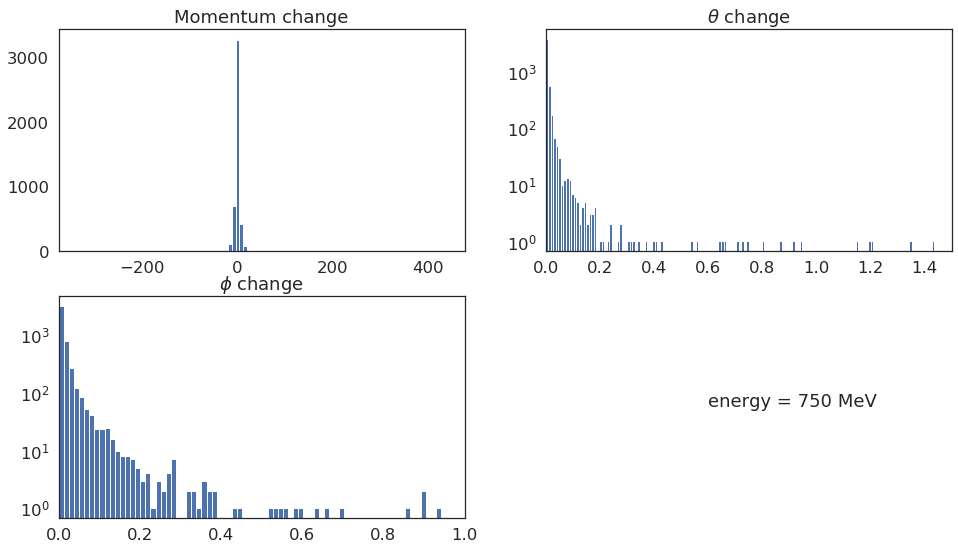

In [68]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.hist(df_ang[0].ptot - df_ang[0].ksptot, bins=100);
plt.title('Momentum change');
plt.subplot(2,2,2)
plt.hist(np.abs(df_ang[0].th - df_ang[0].ksth), bins=200);
plt.xlim(0,1.5)
plt.yscale('log')
plt.title('$\\theta$ change');
plt.subplot(2,2,3)
plt.hist(np.abs(df_ang[0].phi - df_ang[0].ksphi), bins=500);
plt.xlim(0, 1)
plt.yscale('log')
plt.title('$\\phi$ change');
plt.subplot(2,2,4)
plt.axis('off')
plt.text(0.4, 0.5, f'energy = {energy} MeV');

### Кат по $\alpha$

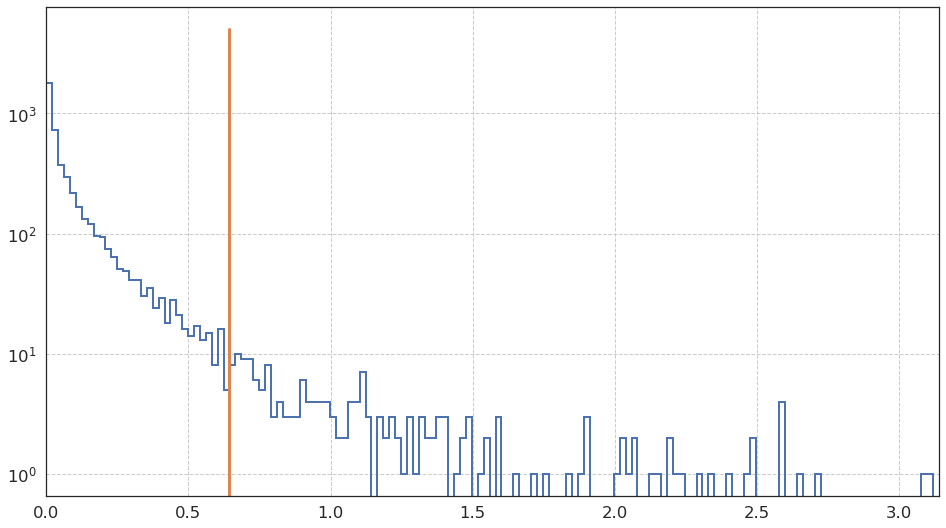

In [44]:
plt.hist(np.arccos(dfks2[0].ksalign), bins=150, histtype='step', lw=2);
yy = [0, 5*10e2]
xx = np.arccos( np.ones(2)*align_cut )
plt.plot(xx, yy, lw=3)
plt.grid(ls='--')
plt.xlim(0, np.pi)
plt.yscale('log')

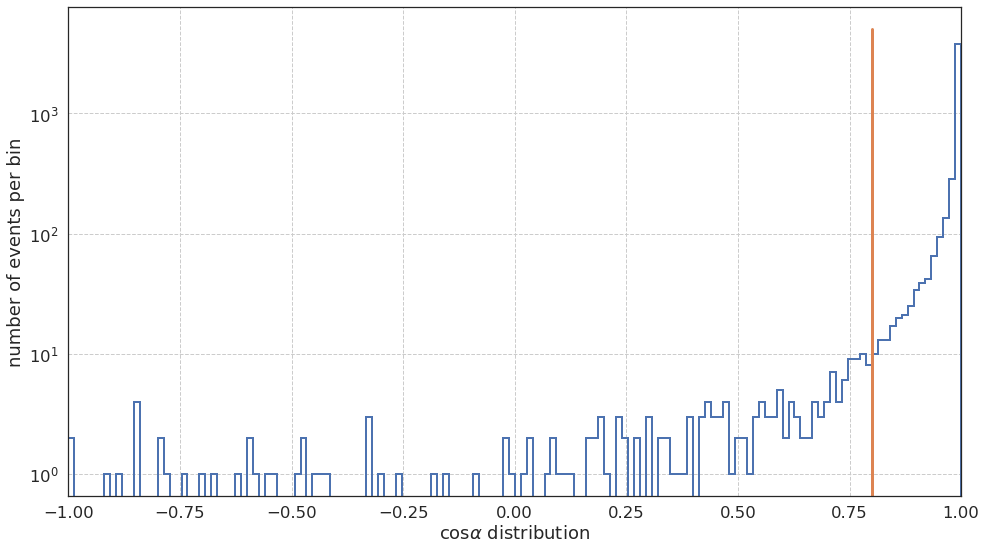

In [45]:
plt.hist(dfks2[0].ksalign, bins=150, histtype='step', lw=2);
yy = [0, 5*10e2]
xx = np.ones(2)*align_cut
plt.plot(xx, yy, lw=3)
plt.grid(ls='--')
plt.xlim(-1, 1)
plt.yscale('log')
plt.xlabel('$\cos{\\alpha}$ distribution')
plt.ylabel('number of events per bin');

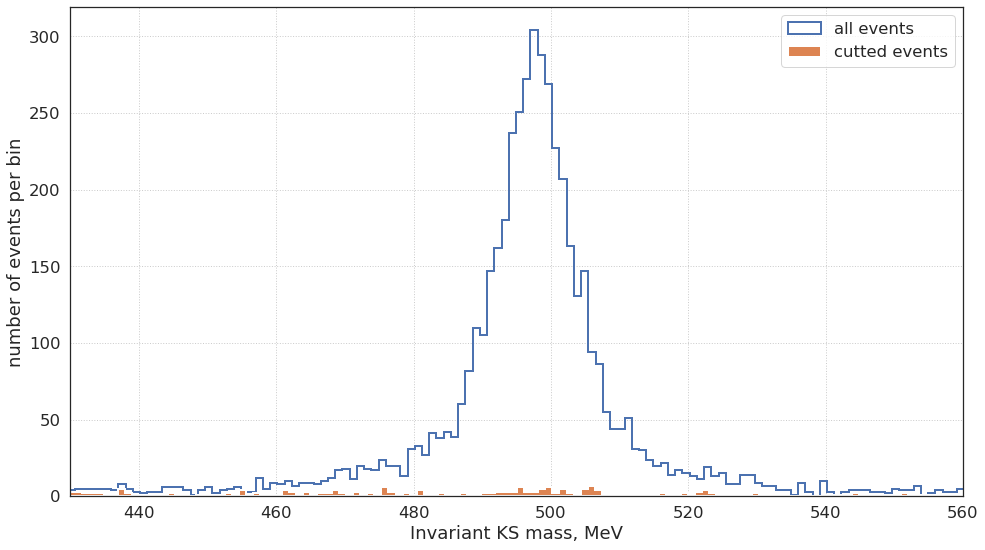

In [46]:
plt.hist( dfks[0].ksminv, bins=150, label='all events', histtype='step', lw=2 );
plt.hist( dfks[0][dfks[0]['ksalign']<align_cut].ksminv, bins=150, label='cutted events', histtype='stepfilled', lw=2 );
plt.grid(ls=':');
plt.legend(frameon=True);
plt.xlim(430, 560);
plt.xlabel('Invariant KS mass, MeV');
plt.ylabel('number of events per bin');

In [47]:
dfks3 = [ d.query('ksalign>@align_cut') for d in dfks2]

In [48]:
dfks3[0].shape

(4590, 9)

### Кат по импульсу

In [49]:
p_ideal = np.sqrt(energy**2 - 497.6**2)
dfks4 = [ d.query('abs(ksptot - @p_ideal)<@p_cut') for d in dfks3]

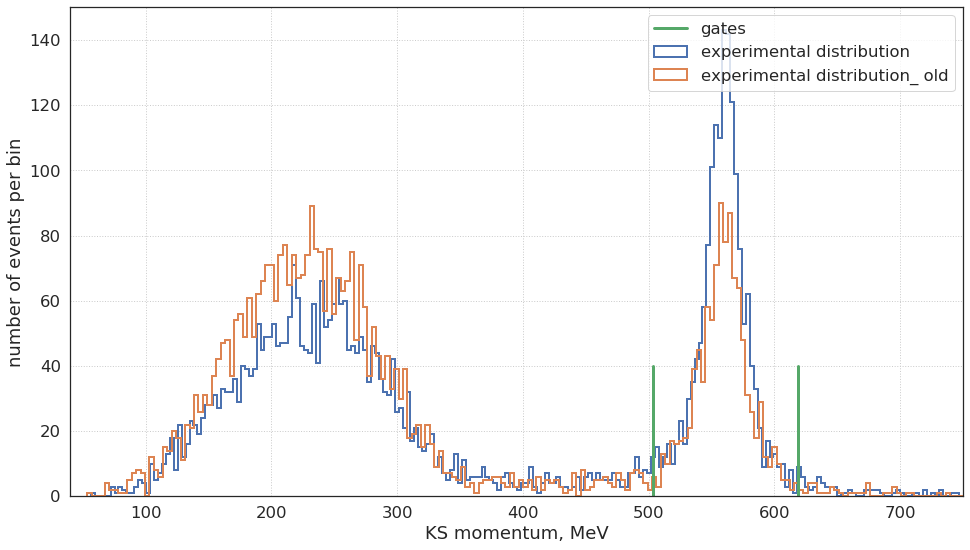

In [50]:
plt.hist(dfks3[0].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution');
plt.hist(dfks3[1].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution_ old');
xx = np.ones(2)*p_ideal
yy = np.linspace(0, 40, 2)
plt.plot(xx-p_cut, yy, c='g', lw=3, label='gates')
plt.plot(xx+p_cut, yy, c='g', lw=3)
plt.xlim(pmin_cut, energy);
plt.grid(ls=':');
plt.legend(frameon=True);
plt.xlabel('KS momentum, MeV');
plt.ylabel('number of events per bin');

In [51]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [52]:
dfks4[0].shape

(1610, 9)

# Объединить результат из блока KS и треков

In [53]:
df5 = [ pd.DataFrame( d.to_records() ).set_index('entry') for d in df4] #превратить subentry в обычный столбец
df5 = [ d.groupby('entry').agg(ksvind_0 = ('subentry', 'min'),
                         ksvind_1 = ('subentry','max') ) for d in df5]

In [54]:
dfks4 = [ d.rename({'ksvind[0]':'ksvind_0', 'ksvind[1]':'ksvind_1'}, axis=1) for d in dfks4 ]

In [55]:
df5[0].head()

,ksvind_0,ksvind_1
entry,,
3,0,1
9,0,1
10,0,1
13,0,1
14,0,1


In [56]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind_0,ksvind_1,ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [57]:
(dfks4[0].ksvind_0 > dfks4[0].ksvind_1).sum() #проверка, что в нулевом всегда меньшее значение чем в первом

0

In [58]:
dfks4[0].shape

(1610, 9)

In [59]:
result = [ pd.merge(d, dks, on=['entry', 'ksvind_0', 'ksvind_1']) for d, dks in zip(df5, dfks4) ]

In [60]:
result[0].head()

,ksvind_0,ksvind_1,nks,kstype,ksalign,ksminv,ksptot,ksth,ksphi
entry,,,,,,,,,
18,0,1,1,0,0.974665,518.642273,618.302063,2.037943,3.891665
23,0,1,1,0,0.995576,445.000244,580.423218,1.275376,2.889709
24,0,1,1,0,0.999972,496.352020,563.272400,1.692486,1.235848
41,0,1,1,0,0.999927,500.651520,557.944763,2.080942,2.384397
51,0,1,1,0,0.999996,496.122192,560.477600,1.835418,0.136228


In [61]:
result[0].shape

(1597, 9)

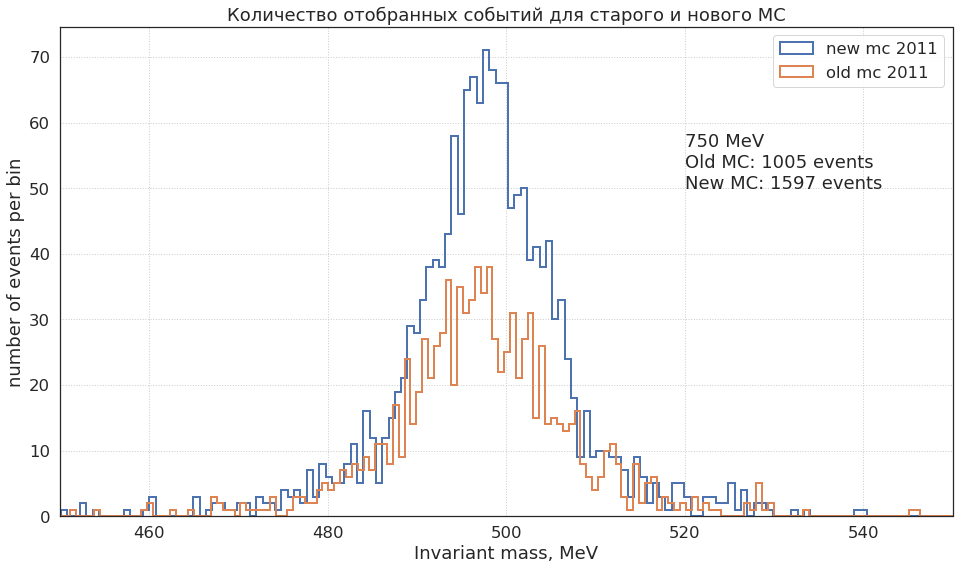

In [62]:
plt.hist(result[0].ksminv, histtype='step', bins=200, lw=2, label='new mc 2011');
plt.hist(result[1].ksminv, histtype='step', bins=200, lw=2, label='old mc 2011');
plt.grid(ls=":")
plt.xlim(450, 550);
plt.xlabel('Invariant mass, MeV');
plt.ylabel('number of events per bin');
plt.legend(frameon=True);
plt.text(520, 50, f'{energy} MeV\nOld MC: {result[1].shape[0]} events\nNew MC: {result[0].shape[0]} events')
plt.title('Количество отобранных событий для старого и нового MC');